In [1]:
from Diatomic import *

### Example 1: Diatomic, Harmonic, Velocity-Verlet

In [2]:
atom1 = Atom(1.0, np.array([-1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atom2 = Atom(1.0, np.array([1.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]), np.array([0.0, 0.0, 0.0]))
atoms = np.array([atom1, atom2])
potential = Harmonic(re = 1.0, k = 1.0)
molecularSystem = MolecularSystem(atoms, potential)
integratorName = "velocityVerlet"
filepath = thisdir / 'Diatomic1'
N = 10000
deltaT = 0.001
startTime = time.time()
molecularSystem = simulate(filepath, molecularSystem, integratorName, N, deltaT)
endTime = time.time()
print("Simulation Time:", endTime - startTime, "seconds")

Simulation Time: 9.343453884124756 seconds


In [3]:

aspath = filepath / 'AtomicSeparations.csv'
avdir = filepath / 'AtomicVelocities'
enpath = filepath / 'Energies.csv'

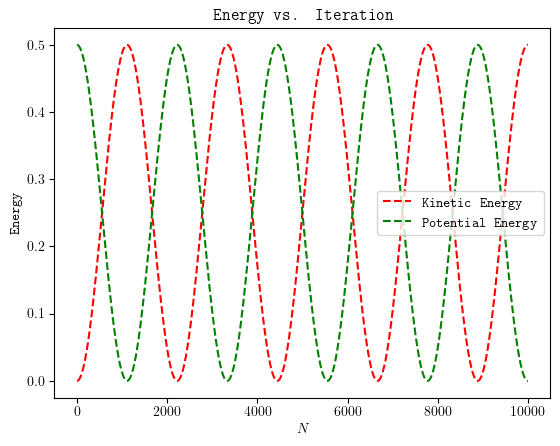

In [4]:
plotEnergies(enpath, "kp")

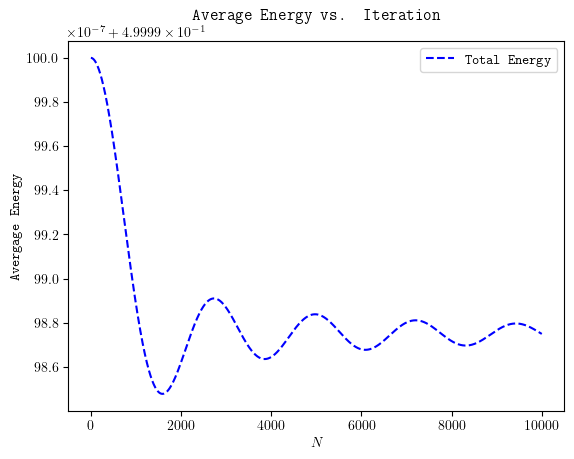

In [5]:
plotRunningAverageEnergies(enpath, "total")

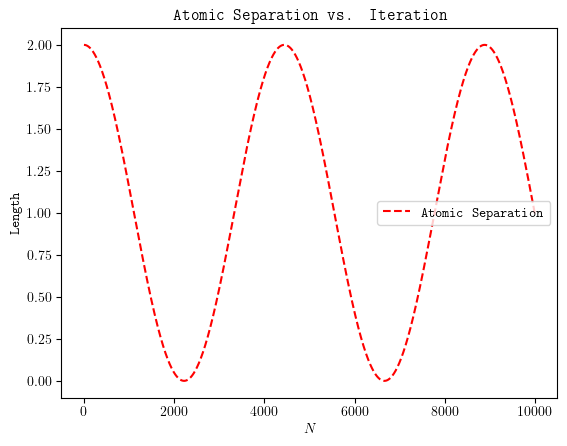

In [6]:
plotAtomicSeparations(aspath, "Atom1-Atom2")

In [7]:
fileNames = ["Atom1", "Atom2"]
vacf = calculateVacf(avdir, fileNames)
powerSpectrum = calculatePowerSpectrum(vacf)

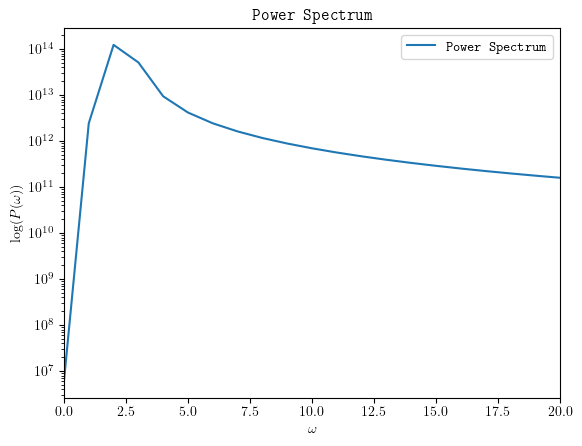

In [8]:
plotPowerSpectrum(avdir, powerSpectrum, [0.0, 20.0], True)

In [9]:
atomicSeparations = pd.read_csv(aspath)
energies = pd.read_csv(enpath)
vv = energies
print("Initial Total Energy:", energies["TE"].iat[0])
print("Final Total Energy:", energies["TE"].iat[-1])
print("Average Total Energy:", np.mean(energies["TE"]))
print("Std. Total Energy:", np.std(energies["TE"]))
print("Average Atomic Separation:", np.mean(atomicSeparations["Atom1-Atom2"]))
print("Std. Atomic Separation:", np.std(atomicSeparations["Atom1-Atom2"]))

Initial Total Energy: 0.4999999999995
Final Total Energy: 0.4999997500061748
Average Total Energy: 0.4999998749435723
Std. Total Energy: 8.840385714910502e-08
Average Atomic Separation: 1.07065953869109
Std. Atomic Separation: 0.7034070818012529
